In [1]:
from notebook import *
from trxas_extract import *
from ipyfilechooser import FileChooser

fc = FileChooser('data')
display(fc)

FileChooser(path='C:\Users\micro\projects\trxas_extract\data', filename='', title='', show_hidden=False, selec…

## Load & check data

In [2]:
check_file(fc.selected)
print("type:%s,\t%d channels, %d bunches, %d orbitals, %d rows" % (G.type,G.num_channel,G.num_bunches,G.num_orbital,G.num_rows))
# print("dir: " + G.folder)
# print("name: " + G.name)
print("\t\t%d data, index range %s - %s" % (len(G.files), G.idx_min, G.idx_max))

reading C:\Users\micro\projects\trxas_extract\data\sample3-00156 ...
type:Energy,	4 channels, 2 bunches, 25 orbitals, 151 rows
		1 data, index range 156 - 156


## Extract data

In [5]:
G.opts['do_poission'] = False
G.opts['rep_rate'] = 0
G.opts['gs_method'] = 'avg bunch GS' # or 'per bunch'
G.opts['trigger'] = 30
G.opts['pre_n_avg'] = 4
if G.type == "Energy":  
    G.opts['aft_n_avg'] = 5
    G.opts['aft_npnt'] = 4
else: # laserd
    G.opts['num_bunch'] = 100
    G.opts['n_pre_bunch'] = 2

G.output_folder = G.folder + '/' + 'saved_data'

extract_all()

reading C:\Users\micro\projects\trxas_extract\data\sample3-00156 ...
process_trxas_Energy: save data_out to [C:\Users\micro\projects\trxas_extract\data/saved_data\sample3-00156.txt]...
Processed 1 data files in C:\Users\micro\projects\trxas_extract\data/saved_data



## Average extracted data

Averaging 1 data files -> C:\Users\micro\projects\trxas_extract\data/saved_data\avg-156-156.txt


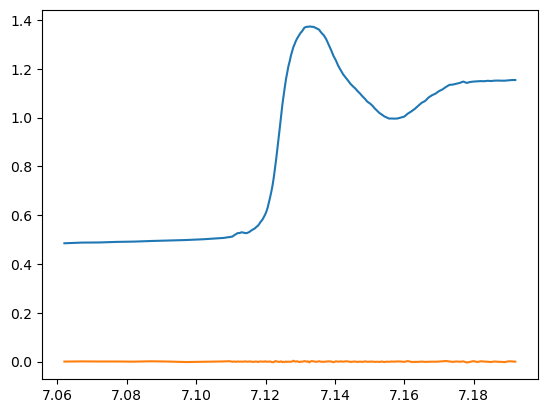

In [8]:
count, G.avg_file = Extract.average_output(G.output_folder, G.idx_min, G.idx_max)
print("Averaging %d data files -> %s" % (count, G.avg_file))

import matplotlib.pyplot as plt
col = 1
t = np.loadtxt(G.avg_file, skiprows=1)
if t.shape[1] != 2:
    plt.plot(t[:,0], t[:,col], label='raw')
    plt.plot(t[:,0], t[:,col+1], label='diff')
